In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [498]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# 3 kategorik degisken icin one-hot enc

In [499]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [500]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [501]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [502]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [503]:
poly_reg = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [504]:
y_pred_lin = lin_reg.predict(X_test)

y_pred_pol = pol_reg.predict(poly_reg.fit_transform(X_test))

In [505]:
mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_pol)

(127487.05257542137, 3956405.605339241)

In [506]:
len(pol_reg.coef_)

209

In [507]:
len(lin_reg.coef_)

19

In [508]:
pd.DataFrame(zip(poly_reg.get_feature_names(df.drop('Salary',axis=1).columns),pol_reg.coef_),columns=["feature","coef_"]).head(19)
# PolynomialFeatures kullanımından dolayı 19 feature varken 209 katsayımız oluştu
# 209 katsayı arasından tablodaki featureler ve bu featurelerın katsayıları(X^n terimlerinin katsayilari, orjinal katsayilar) bastırılmıştır

,feature,coef_
0,AtBat,79.800708
1,Hits,-49.568157
2,HmRun,180.363531
3,Runs,-42.087404
4,RBI,-32.936431
5,Walks,132.884427
6,Years,-123.384497
7,CAtBat,-114.020768
8,CHits,-1154.969037
9,CHmRun,-744.256031


In [509]:
thetas = pol_reg.coef_[:19]

In [510]:
thetas

array([   79.80070829,   -49.56815672,   180.36353149,   -42.08740444,
         -32.93643135,   132.88442718,  -123.38449724,  -114.02076781,
       -1154.96903665,  -744.25603082,   -12.06413763,  2104.97811311,
         -15.61045438,   -84.85160702,   344.94805486,  -150.35489579,
        -582.48025223,  -212.88223558,  1384.98979911])

In [511]:
X_train.dot(thetas)
#prediction values vector

array([  991.59365716,  1606.21834458,  -973.44773245,  -828.61947423,
         554.17207709,  -632.35271492,   725.72666755,   872.2389085 ,
        1549.30440644,  2163.45943205,  2082.76359692,   939.01774553,
         208.6469156 ,  -197.05039931,  1514.02516192,  1659.10294458,
        1231.86075499,  1430.07307648, -2662.10579644,  -689.48973857,
       -1012.60188319,  1098.57188062,   950.24846291,  1636.17888239,
       -1312.2051626 ,   296.81852747,  -502.73226826,   123.92332188,
         588.28946005,  -807.64722164, -1828.4740035 ,  1898.6576093 ,
        -425.77340756,   933.97776535, -2637.23431582,  -435.83677086,
        -525.97912948,   -95.85588272,  -130.97668053,   538.22781681,
        -773.36686614, -1069.95238874,  -900.14398599, -1409.76932718,
         613.71409912,  -915.35365309,  -639.08040188,   256.43436724,
         284.05090991,  -226.85565666, -2037.07367766, -1015.82468263,
        1567.83492658,  -292.81179005,  1328.67665729,  -792.46523278,
      

In [512]:
def J(X,y,thetas):
    
    m = len(y)    
    predictions = np.dot(X,thetas)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    
    return cost

In [513]:
without_GD_cost = J(X_train,y_train,thetas)

In [517]:
def gradient_descent(X,y,thetas,learning_rate=0.005,iterations=100000):
    
    thetas_ = thetas
    m = len(y)
    cost_hist = np.zeros(iterations)
    
    for it in range(iterations):
        predictions = np.dot(X,thetas_)
        thetas_ = thetas_ -(1/m)*learning_rate*( X.T.dot((predictions - y)))        
        cost_hist[it]  = J(X,y,thetas_)

    return thetas_, cost_hist

In [518]:
pol_reg.coef_[0:19], cost_hist = gradient_descent(X_train,y_train,thetas)

In [519]:
y_pred_pol_GD = pol_reg.predict(poly_reg.fit_transform(X_test))
print("default:",mean_squared_error(y_test, y_pred_pol),"w/GD:",mean_squared_error(y_test, y_pred_pol_GD))

default: 3956405.605339241 w/GD: 4703121.855359645


In [520]:
mean_squared_error(y_test, y_pred_pol) < mean_squared_error(y_test, y_pred_pol_GD)
# gradient descent uygulandikca MSE degeri artiyor cunku; gradient descent ile 209 katsayi arasindan 19 tanesini 
# ayrık bir şekilde optimize ettik ve update ettik halbu ki modelin MSE sini dusurmek icin 209 unu da alan vektor simultane optimize edilmeli 
# fakat modeli teste soktugumuzda diger katsayilarla da birlikte yani 209 katsayiyla beraber teste sokuyoruz
# dolayisiyla gradient descent ile elde edilen modelin MSE degeri defaulta gore daha yuksektir

# katsayilar, daraltilmis kapsamda 19 orjinal katsayi uzerinden ele alinmistir(X^n terimlerinin katsayilari)
# dolayisiyla gradient descentin duzgun calisip calismadigini test etmek icin; 
# gradient descent calismadan once ham modelin cost'unu hesaplamak ve ardindan gradient descent uygulanarak guncellenmis 19 
# katsayi degeri ile son iterasyondaki cost'u hesaplayip iyilesme olup olmadigina bakmaktir
# cunku burada cost fonksiyonu 19 feature'a daralttigimiz kisimla ilgileniyor.

True

In [521]:
cost_hist[:100] # cost value iterasyonlarla birlikte dusuyor

array([2.77719652e+10, 2.75270320e+10, 2.72872302e+10, 2.70524091e+10,
       2.68224246e+10, 2.65971389e+10, 2.63764201e+10, 2.61601414e+10,
       2.59481816e+10, 2.57404241e+10, 2.55367572e+10, 2.53370732e+10,
       2.51412690e+10, 2.49492448e+10, 2.47609050e+10, 2.45761573e+10,
       2.43949127e+10, 2.42170853e+10, 2.40425923e+10, 2.38713537e+10,
       2.37032921e+10, 2.35383327e+10, 2.33764033e+10, 2.32174337e+10,
       2.30613563e+10, 2.29081052e+10, 2.27576168e+10, 2.26098294e+10,
       2.24646830e+10, 2.23221194e+10, 2.21820821e+10, 2.20445163e+10,
       2.19093687e+10, 2.17765873e+10, 2.16461218e+10, 2.15179230e+10,
       2.13919432e+10, 2.12681360e+10, 2.11464560e+10, 2.10268590e+10,
       2.09093022e+10, 2.07937436e+10, 2.06801424e+10, 2.05684586e+10,
       2.04586535e+10, 2.03506891e+10, 2.02445284e+10, 2.01401352e+10,
       2.00374742e+10, 1.99365111e+10, 1.98372121e+10, 1.97395443e+10,
       1.96434757e+10, 1.95489748e+10, 1.94560110e+10, 1.93645542e+10,
      

In [522]:
with_GD_cost = cost_hist[-1] # en guncel/iyi deger seciliyor

In [523]:
with_GD_cost < without_GD_cost # gradient_descent fonksiyonu optimizasyon sagliyor ...

True

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

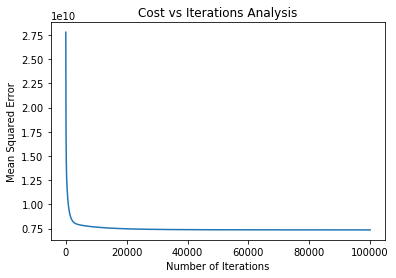

In [526]:
plt.plot(range(100000),cost_hist) # range(iterations)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')